In [1]:
import random
import matplotlib.pyplot as plt

### Compute P(n) using a dynamic programming approach

In [2]:
# Create a list to store 'P(n)'s that have been computed
P_dynamic_values = [1,1/2]    # We know P(1)=1 and P(2)=1/2

# Define a function that outputs P(n)
def P_dynamic(n):
    # Check the validity of n
    if type(n) != int or n < 1:
        print("invalid n")
        return None

    global P_dynamic_values

    # If P(n) has been computed already, no further computation is required.
    # Otherwise, increment P_list until P(n) is included.
    while len(P_dynamic_values) < n:
        # Compute P(n+1) using the recursive relation
        P_dynamic_values.append(P_dynamic_values[-1]/2 + P_dynamic_values[-2]/2)

    # Return P(n)
    return P_dynamic_values[n-1]

In [3]:
# Initialize an empty string to hold the results
results_str = ""

# Loop through values of n from 1 to 10 and append the result of P_dynamic(n) to the string
for n in range(1, 10):
    results_str += f"{P_dynamic(n):.10f}, "

# Print the results string, removing the trailing comma and space at the end
print(results_str.rstrip(', '))

1.0000000000, 0.5000000000, 0.7500000000, 0.6250000000, 0.6875000000, 0.6562500000, 0.6718750000, 0.6640625000, 0.6679687500


### Compute P(n) directly using the derived general formula

In [4]:
def P_formula(n):
    # Compute P(n) using the general formula
    return 2*(1-(-0.5)**n)/3

In [5]:
# Initialize an empty string to hold the results
results_str = ""

# Loop through values of n from 1 to 10 and append the result of P_formula(n) to the string
for n in range(1, 10):
    results_str += f"{P_formula(n):.10f}, "

# Print the results string, removing the trailing comma and space at the end
print(results_str.rstrip(', '))

1.0000000000, 0.5000000000, 0.7500000000, 0.6250000000, 0.6875000000, 0.6562500000, 0.6718750000, 0.6640625000, 0.6679687500


##### We can see that the results computed using both methods coincide.

### Plot the result using the general formula

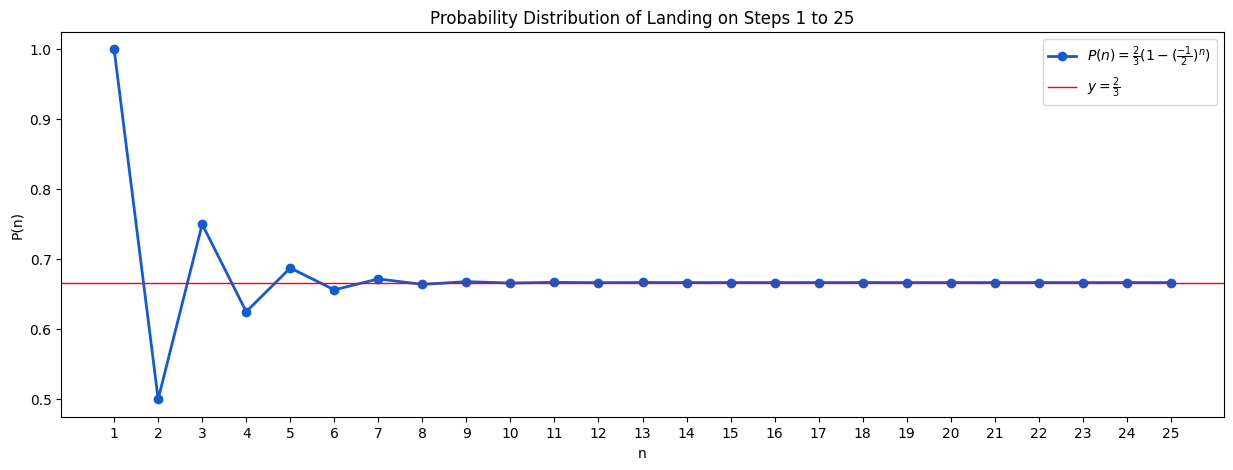

In [6]:
N = 25  # Plot P(n) for n up to N
x = [n for n in range(1,N+1)]
y = [P_formula(n) for n in range(1,N+1)]

# Create a polt of P(n) against n
plt.figure(figsize=(15,5))
plt.plot(x, y, '-o', color='#135BD0', linewidth=2, label=r'$P(n)=\frac{2}{3}(1-(\frac{-1}{2})^n)$')
plt.axhline(y=2/3, color='red', linestyle='-', linewidth=1, label=r'$y = \frac{2}{3}$') # Add the asymptote

plt.title(f'Probability Distribution of Landing on Steps 1 to {N}')
plt.legend()
plt.xlabel('n')
plt.ylabel('P(n)')
plt.xticks(x)
plt.show()

### Plot the result using the generalized general formula

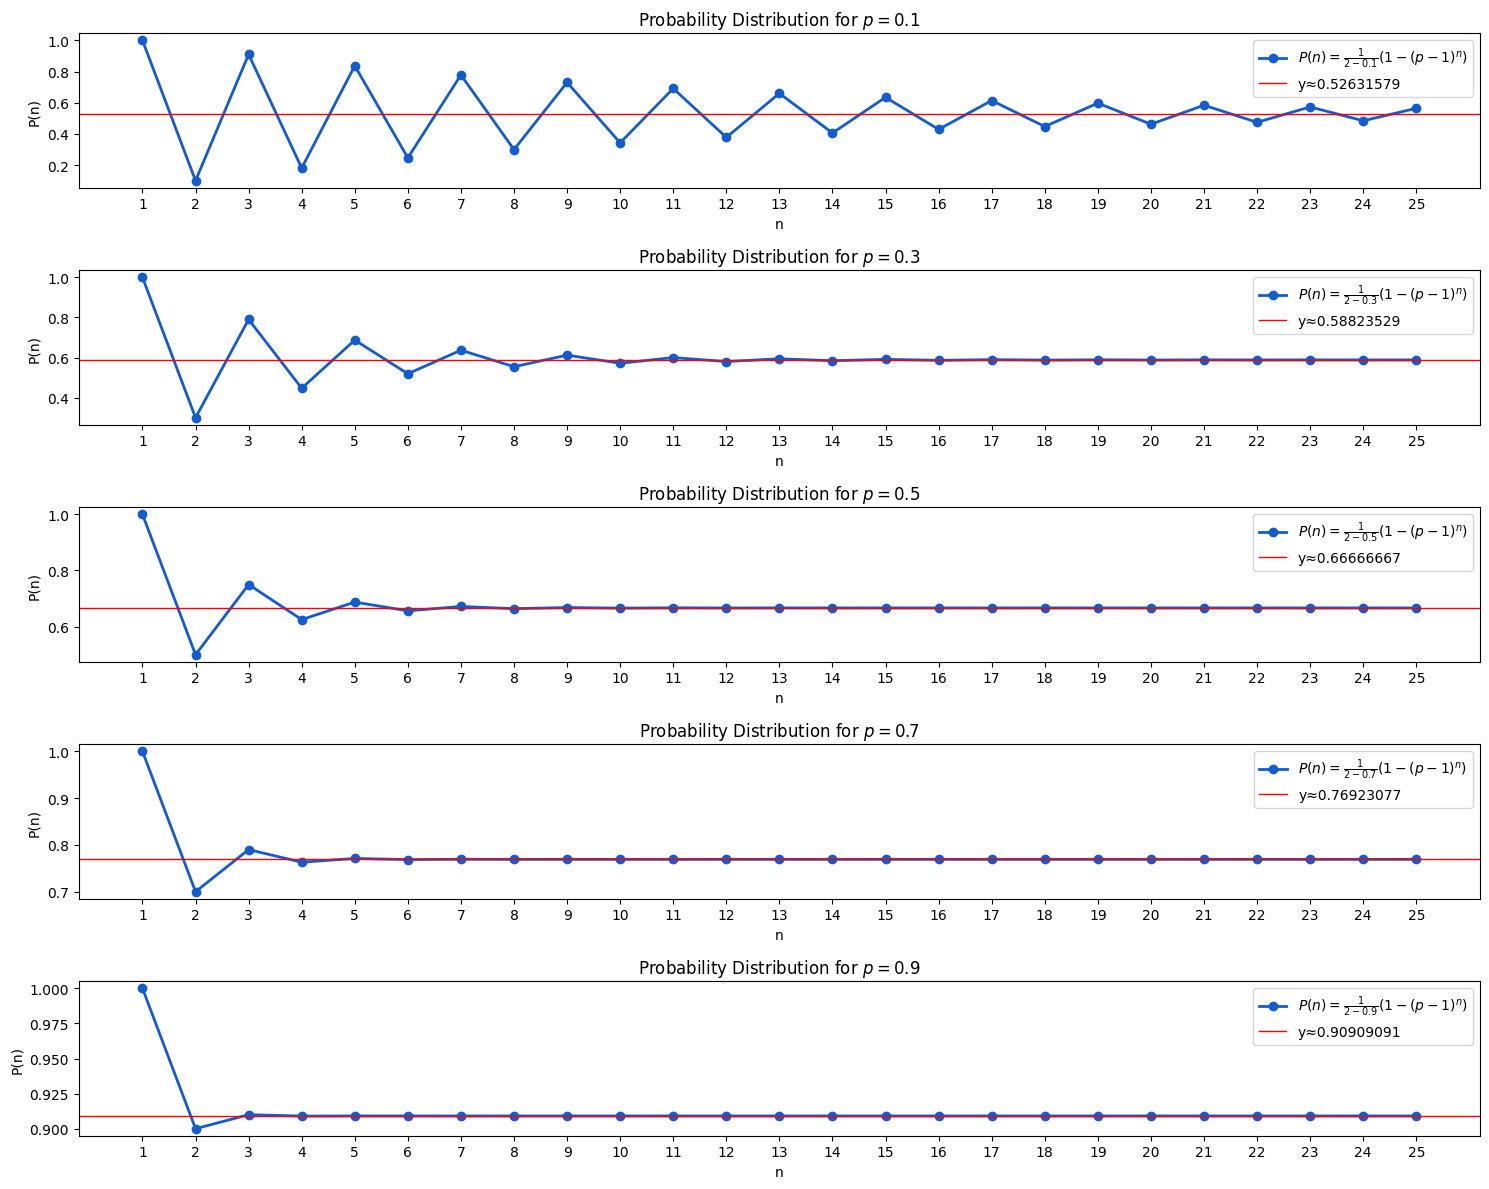

In [7]:
# Adjusted definition to include variable 'p'
def P_formula(n, p):
    return 1/(2-p)*(1-(p-1)**n)

# Different values of p to use in each subplot
p_values = [0.1, 0.3, 0.5, 0.7, 0.9]
N = 25
x = [n for n in range(1, N+1)]

# Create 5x1 subplots
fig, axs = plt.subplots(5, 1, figsize=(15, 12))

for i, p in enumerate(p_values):
    y = [P_formula(n, p) for n in x]
    axs[i].plot(x, y, '-o', color='#135BD0', linewidth=2, label=fr'$P(n)=\frac{{1}}{{2-{p}}}(1-(p-1)^n)$')
    axs[i].axhline(y=1/(2-p), color='red', linestyle='-', linewidth=1, label=f'y≈{1/(2-p):.8f}')
    axs[i].set_title(f'Probability Distribution for $p={p}$')
    axs[i].legend() 
    axs[i].set_xlabel('n')
    axs[i].set_ylabel('P(n)')
    axs[i].set_xticks(x)

plt.tight_layout()
plt.show()

In [8]:
# Computes P(25) for p=0,0.1,0.2,...,1
for p in range(0,11):
    print(f'when p={p/10}, P(25)={P_formula(25, p/10)}')

when p=0.0, P(25)=1.0
when p=0.1, P(25)=0.5640998940890449
when p=0.2, P(25)=0.5576543851034976
when p=0.3, P(25)=0.5883141805070391
when p=0.4, P(25)=0.6250017768930018
when p=0.5, P(25)=0.6666666865348816
when p=0.6, P(25)=0.7142857143661356
when p=0.7, P(25)=0.7692307692308344
when p=0.8, P(25)=0.8333333333333334
when p=0.9, P(25)=0.9090909090909091
when p=1.0, P(25)=1.0


In [9]:
# List of probabilities p for moving 1 step; 1-p will then be the probability of moving 2 steps
p_list = [i / 10 for i in range(11)]

for p in p_list:
    count = 0  # Reset count for each probability p to track landings on path number 25
    # Simulate the random walk 10,000,000 times for each probability p
    for _ in range(10000000):
        m = 1  # Initialize start position at step 1

        # Continue moving until reaching or surpassing step 25
        while m < 25:
            # Move 1 step with probability p, or 2 steps with probability 1-p
            if random.random() < p:
                m += 1  # Move 1 step
            else:
                m += 2  # Move 2 steps
        # Increment count if exactly landing on path number 25
        if m == 25: 
            count += 1

    # Output the simulation result for the current value of p
    print(f"For p={p}, landed on path number 25 exactly {count} times out of 10,000,000 simulations.")

For p=0.0, landed on path number 25 exactly 10000000 times out of 10,000,000 simulations.
For p=0.1, landed on path number 25 exactly 5641674 times out of 10,000,000 simulations.
For p=0.2, landed on path number 25 exactly 5578703 times out of 10,000,000 simulations.
For p=0.3, landed on path number 25 exactly 5884599 times out of 10,000,000 simulations.
For p=0.4, landed on path number 25 exactly 6248220 times out of 10,000,000 simulations.
For p=0.5, landed on path number 25 exactly 6668338 times out of 10,000,000 simulations.
For p=0.6, landed on path number 25 exactly 7142631 times out of 10,000,000 simulations.
For p=0.7, landed on path number 25 exactly 7690763 times out of 10,000,000 simulations.
For p=0.8, landed on path number 25 exactly 8331819 times out of 10,000,000 simulations.
For p=0.9, landed on path number 25 exactly 9090465 times out of 10,000,000 simulations.
For p=1.0, landed on path number 25 exactly 10000000 times out of 10,000,000 simulations.
